# 0.3.3 Impacto de la selección de datos en la generalización

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import math
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../../../../") 

import utils.paths as path
from utils.paths2 import direcciones

En el tutorial sobre aprendizaje y memorización, se usó un polinomio de grado N para aproximar el siguiente conjunto de datos, cuya gráfica se presenta a continuación.

In [4]:
#
# Función a aproximar
# (Proceso geneador de datos)
#
def f(x):
    return 2 * np.abs(np.sin(x * np.pi / 4 + 0.75)) / (1 + 0.1 * x)


#
# Datos reales.
# (No disponibles en la realidad)
#
x_real = np.linspace(0, 10, 100)
x_real = x_real[:, np.newaxis]
y_real = f(x_real)

In [5]:
#
# Muestra de datos.
# (Información disponible en la realidad)
#
rng = np.random.default_rng(12345)

x_sample = np.linspace(0, 10, 100)
rng.shuffle(x_sample)
x_sample = x_sample[:20]
x_sample = np.sort(x_sample)

y_sample = f(x_sample)
X_sample = x_sample[:, np.newaxis]

En el siguiente fragmento de código, se seleccionan aleatoriamente 16 datos para entrenamiento del modelo. Los cuatro datos restantes serían usados para evaluar la generalización del modelo. En la figura de abajo, se grafica el polinomio estimado para cada conjunto de datos.

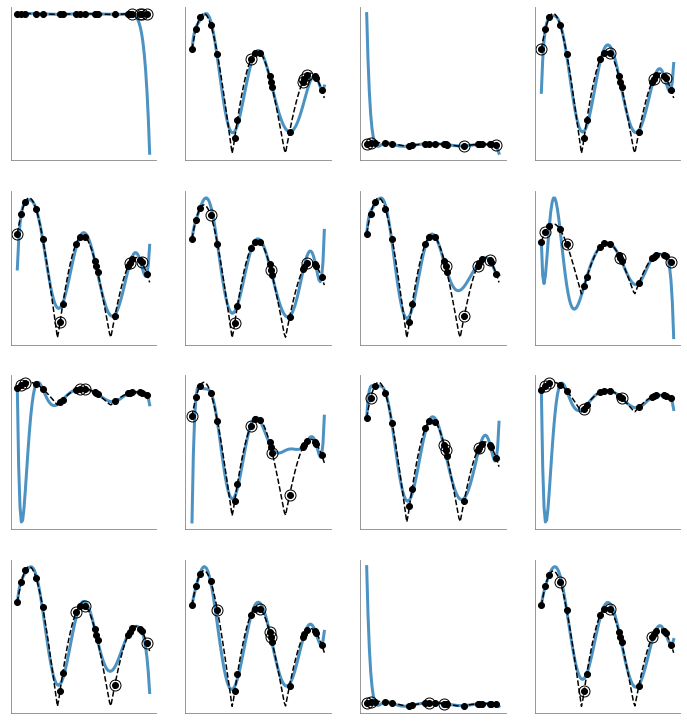

In [6]:
plt.figure(figsize=(12, 13))

optimal_degree = 11

n_samples = len(x_sample)
n_test = 4
n_train = n_samples - n_test

for i_plot in range(16):

    plt.subplot(4, 4, i_plot + 1)

    #
    # Datos
    #
    plt.plot(
        x_real,
        y_real,
        "--",
        color="black",
        alpha=1.0,
        zorder=10,
    )
    plt.plot(
        x_sample,
        y_sample,
        "o",
        color="black",
        alpha=1.0,
        zorder=10,
    )

    #
    # Modelo
    #
    indexes = np.random.choice(
        n_samples,
        n_train,
        replace=False,
    )

    X_sample_train = X_sample[indexes]
    y_sample_train = y_sample[indexes]

    X_sample_test = np.delete(X_sample, indexes)
    y_sample_test = np.delete(y_sample, indexes)

    model = make_pipeline(
        PolynomialFeatures(optimal_degree),
        LinearRegression(),
    )
    model.fit(X_sample_train, y_sample_train)
    y_predicted = model.predict(x_real)

    plt.plot(
        x_real,
        y_predicted,
        color="tab:blue",
        linewidth=3,
        zorder=2,
        alpha=0.8,
    )

    plt.plot(
        X_sample_test,
        y_sample_test,
        "o",
        color="black",
        fillstyle="none",
        markersize=11,
    )

    plt.xticks([], [])
    plt.yticks([], [])

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)


plt.show()

In [7]:
print('ok_')

ok_
